In [5]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


The dataset contains 4,008 rows and 21 columns, including:

Country: The name of the country.
year: The year of the data entry.
Yearly Score: The target variable to predict (currently stored as a string with commas).
goal1 to goal17: Features representing different goal scores.

In [6]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

file_path = "../data/data-ml.csv"
df = pd.read_csv(file_path)
df.head()


,id,country,year,yearly_score,goal1,goal2,goal3,goal4,goal5,goal6,...,goal8,goal9,goal10,goal11,goal12,goal13,goal14,goal15,goal16,goal17
0,AFG,Afghanistan,2020,"47,47",29.00,38,37,43,26,49,...,47,11,NaN,36,95,99,NaN,78,45,43
1,AFG,Afghanistan,2021,"46,27",20.00,38,35,35,29,50,...,45,11,NaN,34,95,99,NaN,78,45,43
2,AFG,Afghanistan,2019,"46,13",30.00,40,36,43,24,45,...,46,11,NaN,35,95,99,NaN,65,46,41
3,AFG,Afghanistan,2022,"45,60",17.00,38,36,35,18,51,...,43,17,NaN,35,96,99,NaN,77,42,43
4,AFG,Afghanistan,2018,"45,53",30.00,41,37,41,21,42,...,47,11,NaN,33,95,99,NaN,65,46,41


There are missing values in some goal columns (e.g., goal1, goal10, goal14). 
Those values have been filled with 0.
The Column Yearly Score was converted to a numerical format.

In [7]:
df["Yearly Score"] = df["Yearly Score"].str.replace(",", ".").astype(float)
goals = ['goal1', 'goal2', 'goal3', 'goal4', 'goal5', 'goal6', 'goal7', 'goal8', 'goal9', 'goal10','goal11', 'goal12', 'goal13', 'goal14', 'goal15', 'goal16', 'goal17']
for goal in goals:
    df[str(goal)] = df[str(goal)].astype(float)
df.fillna(0, inplace=True)
df.head()

KeyError: 'Yearly Score'

#### First Part ####

Predicting the "Yearly Score" for 2030 for each country based on the previous "Yearly Score" data.

- Relevant Columns: We need Country, year, and Yearly Score.
- Prepare the data for time series forecasting.
- Choose and apply a forecasting model (e.g., Linear Regression, ARIMA, or LSTM).
- Predict Yearly Score for 2030 for each country.


In [ ]:
df = df[["Country", "year", "Yearly Score"]]
df = df.sort_values(by=["Country", "year"])
df.head()


,Country,year,Yearly Score
17,Afghanistan,2000,34.60
21,Afghanistan,2001,34.73
23,Afghanistan,2002,35.00
20,Afghanistan,2003,35.40
19,Afghanistan,2004,35.73


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

predictions = []

for country, data in df.groupby("Country"):
    X = data["year"].values.reshape(-1, 1)
    y = data["Yearly Score"].values
    
    if len(X) < 2:
        continue
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict([[2030]])[0]
    predictions.append({"Country": country, "Year": 2030, "Predicted Yearly Score": y_pred})

pred_df = pd.DataFrame(predictions)
print(pred_df.head())


       Country  Year  Predicted Yearly Score
0  Afghanistan  2030                   51.07
1      Albania  2030                   78.36
2      Algeria  2030                   74.43
3       Angola  2030                   54.62
4    Argentina  2030                   78.03


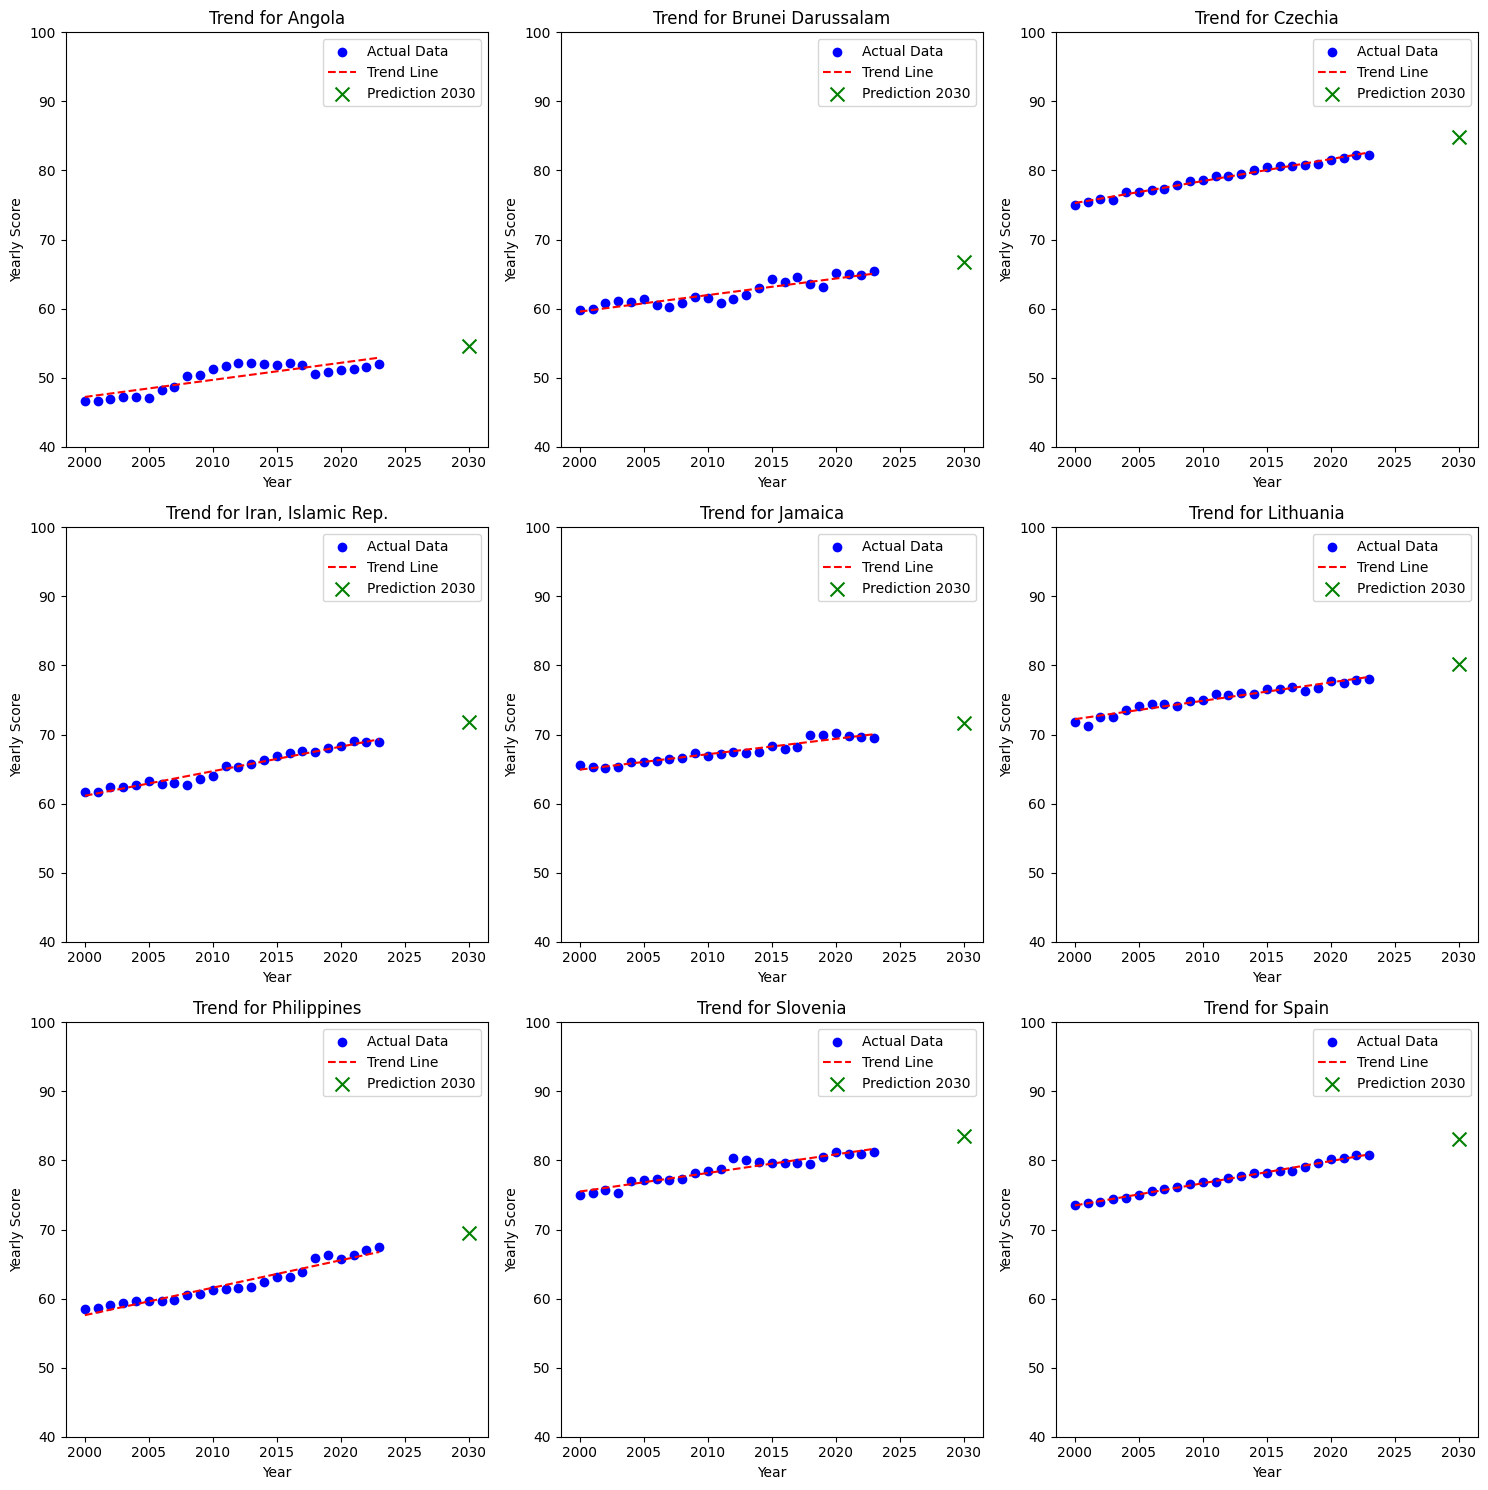

       Country  Year  Predicted Yearly Score
0  Afghanistan  2030                   51.07
1      Albania  2030                   78.36
2      Algeria  2030                   74.43
3       Angola  2030                   54.62
4    Argentina  2030                   78.03


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Keep only relevant columns
df = df[["Country", "year", "Yearly Score"]]
df = df.sort_values(by=["Country", "year"])

# Store predictions
predictions = []

# Train model and visualize trends for each country
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
selected_countries = df['Country'].drop_duplicates().sample(min(9, df['Country'].nunique()))
filtered_df = df[df['Country'].isin(selected_countries)]

plot_idx = 0  # Track valid plot indices

for country, data in df.groupby("Country"):
    X = data["year"].values.reshape(-1, 1)
    y = data["Yearly Score"].values
    
    if len(X) < 2:
        continue  # Skip countries with insufficient data
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for 2030
    y_pred_2030 = model.predict([[2030]])[0]
    predictions.append({"Country": country, "Year": 2030, "Predicted Yearly Score": y_pred_2030})
    
    # Plot trends for selected countries
    if country in selected_countries.values and plot_idx < len(axes):
        ax = axes[plot_idx]
        plot_idx += 1  # Increment only for valid plots
        y_pred = model.predict(X)
        ax.scatter(X, y, color='blue', label='Actual Data')
        ax.plot(X, y_pred, color='red', linestyle='dashed', label='Trend Line')
        ax.scatter([2030], [y_pred_2030], color='green', marker='x', s=100, label='Prediction 2030')
        ax.set_xlabel('Year')
        ax.set_ylabel('Yearly Score')
        ax.set_title(f'Trend for {country}')
        ax.set_ylim(40,100)
        ax.legend()

plt.tight_layout()
plt.show()

# Convert results to DataFrame
pred_df = pd.DataFrame(predictions)
print(pred_df.head())


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

file_path = "../data/data-ml.csv"
df = pd.read_csv(file_path)
print(df.head(5))
df["Yearly Score"] = df["Yearly Score"].str.replace(",", ".").astype(float)

df.fillna(0, inplace=True)

df = df[["Country", "year", "Yearly Score"]]
df = df.sort_values(by=["Country", "year"])

predictions = []

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
selected_countries = 'Ukraine' #df['Country'].drop_duplicates().sample(min(9, df['Country'].nunique()))
filtered_df = df[df['Country'].isin(selected_countries)]

plot_idx = 0  # Track valid plot indices

for country, data in df.groupby("Country"):
    X = data["year"].values.reshape(-1, 1)
    y = data["Yearly Score"].values
    
    if len(X) < 2:
        continue  # Skip countries with insufficient data
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for 2030
    y_pred_2030 = model.predict([[2030]])[0]
    
    # Calculate MAPE (Mean Absolute Percentage Error)
    y_pred = model.predict(X)
    mape = np.mean(np.abs((y - y_pred) / y)) * 100
    
    predictions.append({"Country": country, "Year": 2030, "Predicted Yearly Score": y_pred_2030, "MAPE": mape})
    
    # Plot trends for selected countries
    if country in selected_countries.values and plot_idx < len(axes):
        ax = axes[plot_idx]
        plot_idx += 1  # Increment only for valid plots
        ax.scatter(X, y, color='blue', label='Actual Data')
        ax.plot(X, y_pred, color='red', linestyle='dashed', label='Trend Line')
        ax.scatter([2030], [y_pred_2030], color='green', marker='x', s=100, label='Prediction 2030')
        ax.set_xlabel('Year')
        ax.set_ylabel('Yearly Score')
        ax.set_ylim(40,100)
        ax.set_title(f'Trend for {country} (MAPE: {mape:.2f}%)')
        ax.legend()

plt.tight_layout()
plt.show()

# Convert results to DataFrame
pred_df = pd.DataFrame(predictions)
print(pred_df.head())


    id      country  year yearly_score  goal1  goal2  goal3  goal4  goal5  \
0  AFG  Afghanistan  2020        47,47   29.0     38     37     43     26   
1  AFG  Afghanistan  2021        46,27   20.0     38     35     35     29   
2  AFG  Afghanistan  2019        46,13   30.0     40     36     43     24   
3  AFG  Afghanistan  2022        45,60   17.0     38     36     35     18   
4  AFG  Afghanistan  2018        45,53   30.0     41     37     41     21   

   goal6  ...  goal8  goal9  goal10  goal11  goal12  goal13  goal14  goal15  \
0     49  ...     47     11     NaN      36      95      99     NaN      78   
1     50  ...     45     11     NaN      34      95      99     NaN      78   
2     45  ...     46     11     NaN      35      95      99     NaN      65   
3     51  ...     43     17     NaN      35      96      99     NaN      77   
4     42  ...     47     11     NaN      33      95      99     NaN      65   

   goal16  goal17  
0      45      43  
1      45      43  
2 

KeyError: 'Yearly Score'